# Matemática Computacional II

## Atividade avaliativa #3

### MTM00042 - 1ºSem/2024- Prof. Tiago M. Buriol

**Nome:** Vitor Dallabona

In [1]:
# Importações das Bibliotecas

import numpy as np
import matplotlib.pyplot as plt

**1.** Faça o gráfico da função 

$$\quad f(x, y)=\left(x^2+3 y^2\right) e^{-x^2-y^2}$$

Em seguida represente a função com curvas de nível.



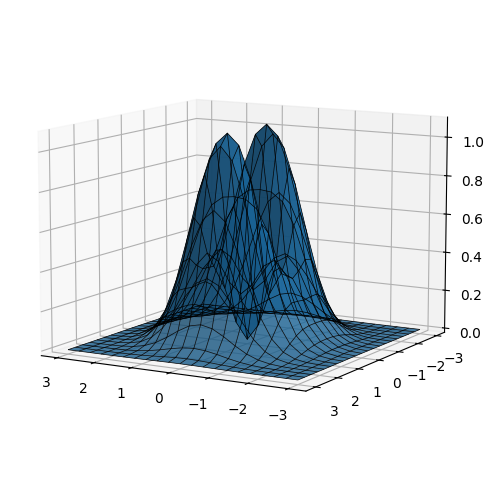

In [2]:

# Gráfico da função

from numpy import exp

d = lambda x,y: (x**2 + 3*y**2)*exp(-x**2-y**2)

# cria a malha
x = np.linspace(-3, 3, 21) # intervalo de pontos de x
y = np.linspace(-3, 3, 21) # intervalo de pontos de y
xi, yi = np.meshgrid(x, y) # cria uma malha com os pontos de x e y

# cria a figura
fig = plt.figure(figsize=(8,6)) # cria uma figura 
ax = fig.add_subplot(projection='3d') # cria um subplot dentro da figura

# plota superficie
ax.plot_surface(xi, yi, d(xi,yi), alpha=0.8) # recebe as coordenadas e a função
ax.plot_wireframe(xi, yi, d(xi,yi), color='black', lw=0.5) # cria um wireframe pra visualização
ax.view_init(10, 120) # posição de visualização do gráfico
plt.show()

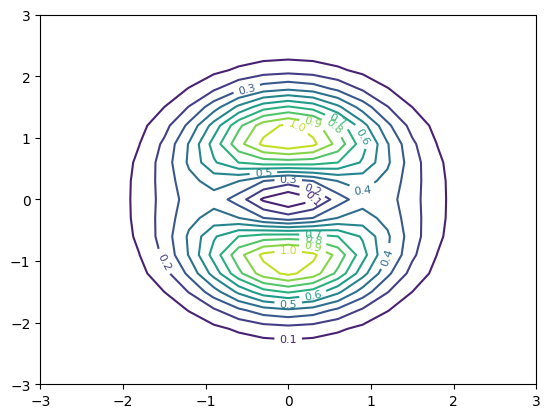

In [3]:
# plota curvas de nível

ax = fig.add_subplot() # adiciona outro subplot na figura
c = plt.contour(x, y, d(xi,yi), 10) # cria as curvas de nível
ax.clabel(c, inline=2, fontsize=8)
ax.set_aspect('equal')
plt.show()

**2.** Plote os campos vetoriais:

(a) $\mathbf{F}(x, y)=\left\langle\ln \left(1+y^2\right), \ln \left(1+x^2\right)\right\rangle$

(b) $\mathbf{F}(x, y, z)=\frac{y}{z} \mathbf{i}-\frac{x}{z} \mathbf{j}+\frac{z}{4} \mathbf{k}$

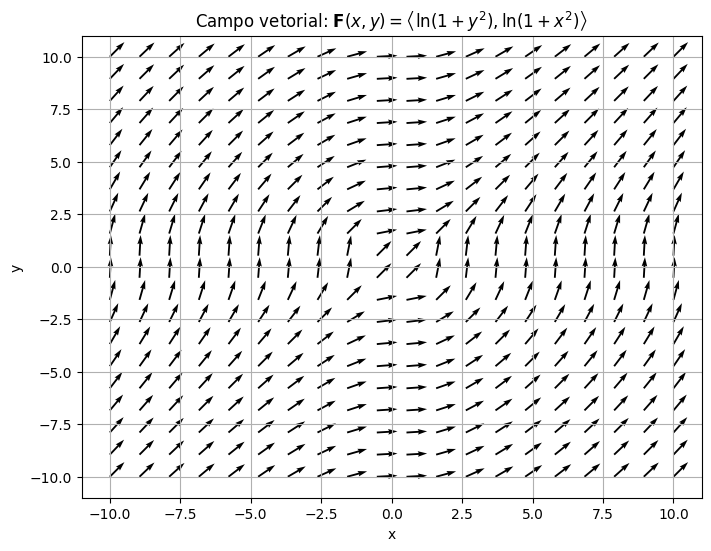

In [4]:
# Definição dos vetores
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
xi, yi = np.meshgrid(x, y)

u = np.log(1 + yi**2)  # Componente x do vetor
v = np.log(1 + xi**2)  # Componente y do vetor

# Normalização dos vetores
norm = np.sqrt(u**2 + v**2)
u_norm = u / norm
v_norm = v / norm

# Plot do campo vetorial
plt.figure(figsize=(8, 6))
plt.quiver(xi, yi, u_norm, v_norm, scale=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vetorial: $\\mathbf{F}(x, y) = \\left\\langle \\ln(1 + y^2), \\ln(1 + x^2) \\right\\rangle$')
plt.grid()
plt.show()


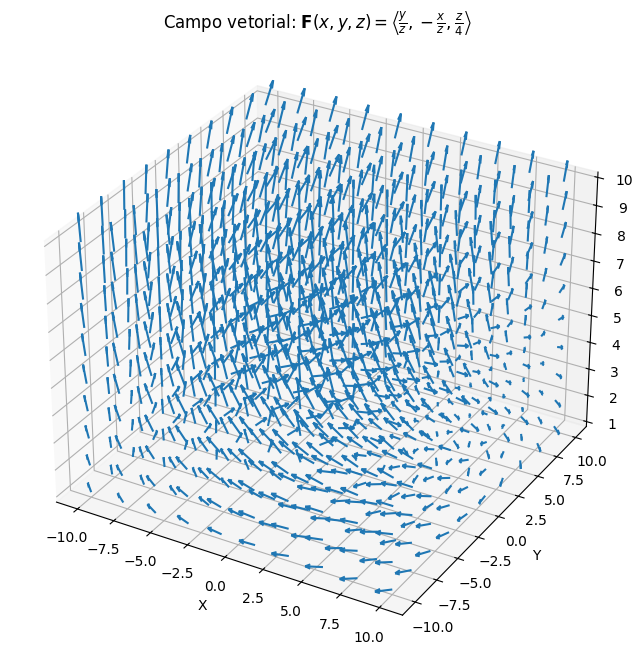

In [5]:
# Definição dos vetores
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
z = np.linspace(1, 10, 10)  # Evitando z = 0 para evitar divisão por zero
xi, yi, zi = np.meshgrid(x, y, z)

u = yi / zi  # Componente x do vetor
v = -xi / zi  # Componente y do vetor
w = zi / 4  # Componente z do vetor

# Plot do campo vetorial
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(xi, yi, zi, u, v, w, length=1, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo vetorial: $\\mathbf{F}(x, y, z) = \\left\\langle \\frac{y}{z}, -\\frac{x}{z}, \\frac{z}{4} \\right\\rangle$')
plt.show()


**3.** Represente graficamente a função
$$
f(x, y)=y^2-2 y \cos x, \quad-5 \leq x \leq 5, \quad -2 \leq y \leq 2,
$$

Então, determine os valores máximos e mínimos locais e pontos de sela.


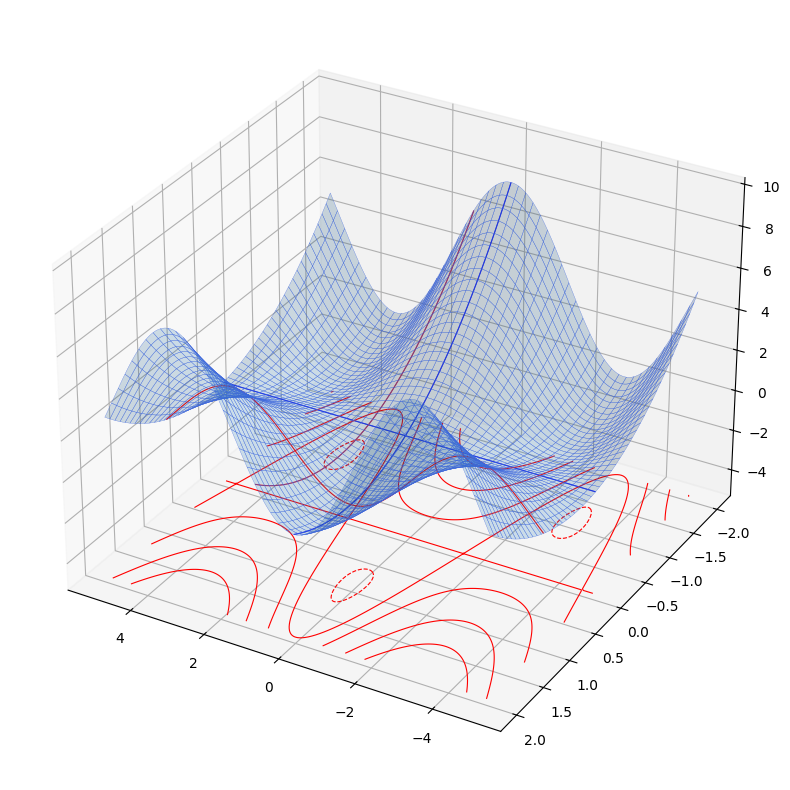

In [6]:
# Gráfico 3D

z= lambda x,y: y**2 - 2*y*np.cos(x)

# malha de pontos
xi, yi = np.meshgrid(np.linspace(-5, 5, 201), 
                     np.linspace(-2, 2, 201))
zi = z(xi,yi)
zi[zi > 10] = np.nan

#criamos a figura e o subplot 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#então, plotamos a figura
ax.plot_surface(xi, yi, zi, 
                edgecolor='royalblue', lw=0.2, 
                rstride=4, cstride=4,
                alpha=0.2)

ax.contour(xi, yi, zi, [0], zdir='x',
                linewidths=0.8, colors='b')
ax.contour(xi, yi, zi, [0], zdir='y',
                linewidths=0.8, colors='b')

ax.contour(xi, yi, zi, [1], zdir='x',
                linewidths=0.8, colors='r')
ax.contour(xi, yi, zi, [1], zdir='y',
                linewidths=0.8, colors='r')

ax.contour(xi, yi, zi, [-0.9,0,1,3,5,10], zdir='z',
                linewidths=0.8, colors='r', offset=-5)

ax.set_zlim3d(-5, 10)
ax.view_init(30, 120)
plt.show()

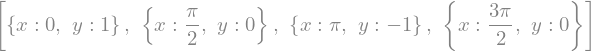

In [7]:
# Para encontrar os pontos de máximo e mínimos e pontos de sela, calculemos o determinante da matriz hessiana

import sympy as sp
sp.init_printing()

#Define os simbolos e funções
x,y = sp.symbols('x, y', real=True)
z = sp.Function('z')
z = y**2-2*y*sp.cos(x)

# Deriva
dzdx = z.diff(x) # derivada em relação a x
dzdy = z.diff(y) # derivada em relação a y

#cria as equações
eq1 = sp.Eq(dzdx,0)
eq2 = sp.Eq(dzdy,0)
pts = sp.solve([eq1,eq2])
pts

In [8]:
# Determinante da matriz hessiana

D = z.diff(x,x)*z.diff(y,y)-z.diff(x,y)**2

In [9]:
# Teste dos valores encontrados

#substituindo x=0 e y=1 na derivada fxx e em D
print('Testando o ponto (0,1):')
print('fxx =',z.diff(x,x).subs([(x, 0), (y, 1)]))
print('D =',D.subs([(x, 0), (y, 1)]))

Testando o ponto (0,1):
fxx = 2
D = 4


In [ ]:
# Como fxx > 0 e D > 0, temos que (0, 1) é ponto de mínimo local

In [10]:
#substituindo x=\pi/2 e y=0 na derivada fxx e em D
print('Testando o ponto (pi/2,0):')
print('fxx =',z.diff(x,x).subs([(x, np.pi/2), (y, 0)]))
print('D =',D.subs([(x, np.pi/2), (y, 0)]))

Testando o ponto (pi/2,0):
fxx = 0
D = -4.00000000000000


In [ ]:
# Como D < 0, temos que (\pi/2 , 0) é ponto de sela

In [11]:
#substituindo x=\pi e y=-1 na derivada fxx e em D
print('Testando o ponto (pi,-1):')
print('fxx =',z.diff(x,x).subs([(x, np.pi), (y, -1)]))
print('D =',D.subs([(x, np.pi), (y, -1)]))

Testando o ponto (pi,-1):
fxx = 2.00000000000000
D = 4.00000000000000


In [ ]:
# Como fxx > 0 e D > 0, temos que (\pi, -1) é ponto de mínimo local

In [12]:
#substituindo x=3\pi/2 e y=0 na derivada fxx e em D
print('Testando o ponto (3*pi/2,0):')
print('fxx =',z.diff(x,x).subs([(x, 3*np.pi/2), (y, 0)]))
print('D =',D.subs([(x, 3*np.pi/2), (y, 0)]))

Testando o ponto (3*pi/2,0):
fxx = 0
D = -4.00000000000000


In [26]:
# Novamente, como D < 0, temos que (3\pi/2 , 0) é ponto de sela

**4.** Determine o volume do sólido abaixo da superficie 
$$z=1+x^2 y^2$$
e acima da região limitada por $x=y^2$ e $x=4$. Faça o gráfico de $z$  e da região de integração

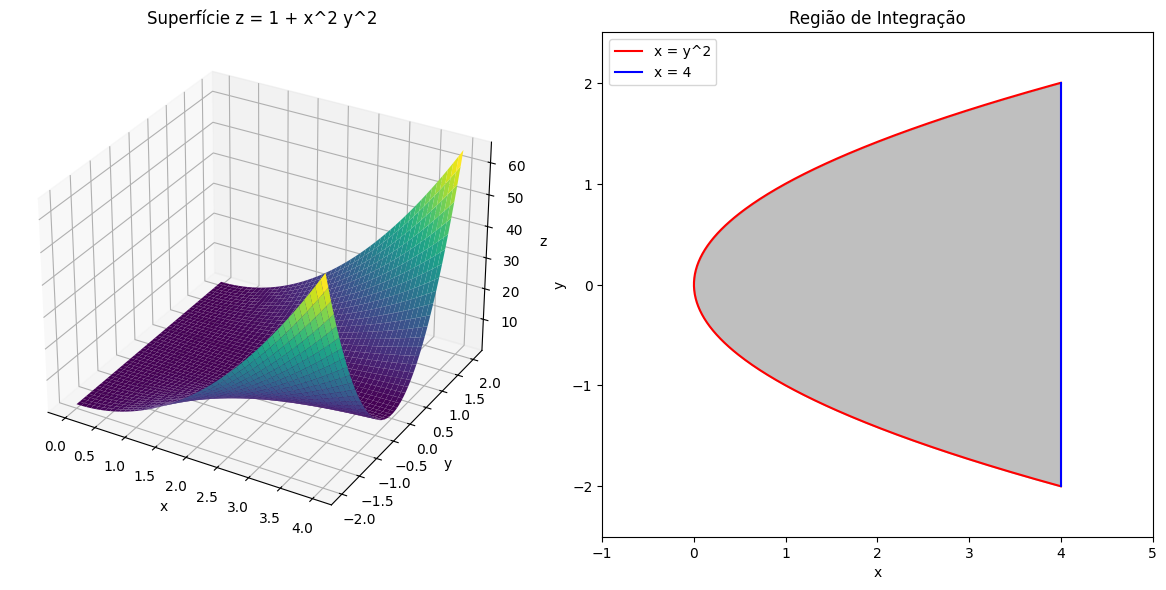

In [15]:
# Fazer o gráfico da superfície e da região de integração
y = np.linspace(-2, 2, 400)
x = np.linspace(0, 4, 400)
X, Y = np.meshgrid(x, y)
Z = 1 + X**2 * Y**2

fig = plt.figure(figsize=(12, 6))

# Gráfico 3D da superfície
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title('Superfície z = 1 + x^2 y^2')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Gráfico da região de integração
ax2 = fig.add_subplot(122)
ax2.plot(y**2, y, 'r-', label='x = y^2')
ax2.plot([4]*400, y, 'b-', label='x = 4')
ax2.fill_betweenx(y, y**2, 4, color='gray', alpha=0.5)
ax2.set_xlim([-1, 5])
ax2.set_ylim([-2.5, 2.5])
ax2.set_title('Região de Integração')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()

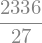

In [18]:
# Cálculo do Volume

# A região de integração é limitada por x = y^2 e x = 4.
# Logo, x varia de y^2 a 4 e y de -2 a 2, pois y^2 = 4.

x, y = sp.symbols('x y')
f = 1 + x**2 * y**2
integral = sp.integrate(f, (x, y**2, 4))
volume = sp.integrate(integral, (y, -2, 2))
volume

**5.** Faça o gráfico e encontre uma aproximação para o comprimento da curva $C$ com equações paramétricas 

$$x=e^{-t} \cos 4 t$$ 
$$y=e^{-t} \operatorname{sen} 4 t$$
$$z=e^{-t}$$

com $0 \leq t \leq 2 \pi$. 

Em seguida, encontre o valor exato da integral $\int_C x^3 y^2 z d s$, .

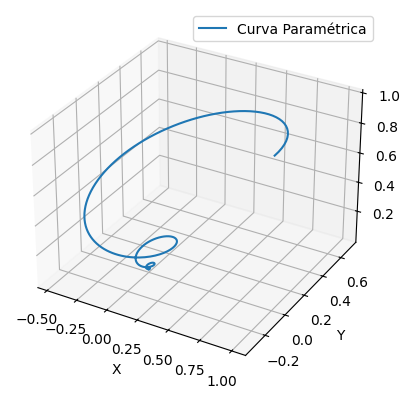

In [55]:
# gráfico da curva

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z
t = np.linspace(0, 2*np.pi, 400)

x = np.exp(-t)*np.cos(4*t)
y = np.exp(-t)*np.sin(4*t)
z = np.exp(-t)

ax.plot(x, y, z, label='Curva Paramétrica')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [61]:
# Definir a variável simbólica
t = sp.symbols('t')

# Definir as equações paramétricas
x = sp.exp(-t) * sp.cos(4*t)
y = sp.exp(-t) * sp.sin(4*t)
z = sp.exp(-t)

# Calcular as derivadas das equações paramétricas
dx_dt = sp.diff(x, t)
dy_dt = sp.diff(y, t)
dz_dt = sp.diff(z, t)

# Calcular ds/dt
ds_dt = sp.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)

# Calcular o comprimento da curva integrando ds/dt de 0 a 2*pi
comprimento_curva = sp.integrate(ds_dt, (t, 0, 2*sp.pi))

# Exibir o resultado
comprimento_curva.evalf()


In [77]:
from scipy.integrate import quad

# Calcular a integral ao longo da curva
def integrand(t):
    x = np.exp(-t) * np.cos(4*t)
    y = np.exp(-t) * np.sin(4*t)
    z = np.exp(-t)
    dx_dt = -np.exp(-t) * np.cos(4*t) - 4 * np.exp(-t) * np.sin(4*t)
    dy_dt = -np.exp(-t) * np.sin(4*t) + 4 * np.exp(-t) * np.cos(4*t)
    dz_dt = -np.exp(-t)
    ds_dt = np.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2) # comprimento da curva
    return (x**3) * (y**2) * z * ds_dt # integrando 

integral, error = quad(integrand, 0, 2*np.pi) # cálculo da integral
integral